In [152]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import meitner
import warnings

import matplotlib.pyplot as plt

from vamas import Vamas

In [153]:
file = 'sh_all.vms'

In [154]:
data0 = meitner.Xps.from_vamas(path=file, region_id=6, break_point='search',
                                    break_point_search_interval=[447,450])
data1 = meitner.Xps.from_vamas(path=file, region_id=14, break_point='search',
                                    break_point_search_interval=[447,450])
xps_list = [data0,data1]

Found 43 blocks.

Detected multiple VAMAS blocks with the same name.

Excitation energy:
1486.69 eV

Found break point at 448.5 eV.
Found 43 blocks.

Detected multiple VAMAS blocks with the same name.

Excitation energy:
1486.69 eV

Found break point at 448.79999999999995 eV.


be goes in decreasing order!

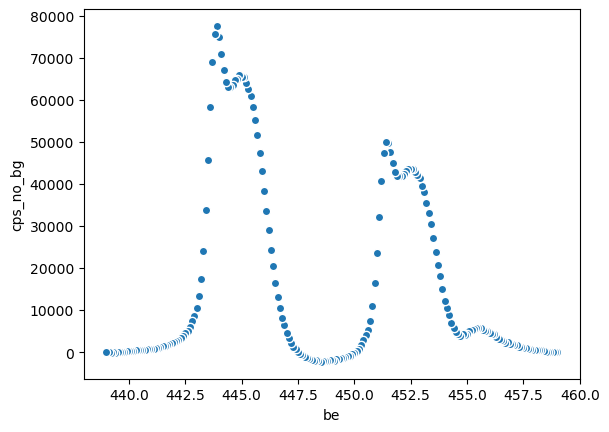

In [155]:
data0.ds.plot.scatter(x='be',y='cps_no_bg')

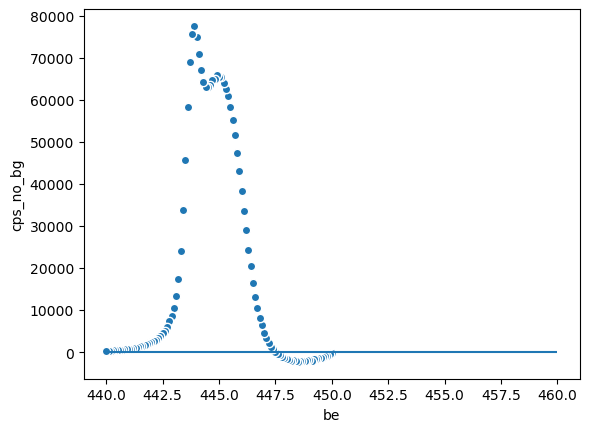

In [156]:
fig, ax = plt.subplots()
data0.ds.sel(be=slice(450,440)).plot.scatter(x='be',y='cps_no_bg',ax=ax)
ax.hlines(data0.ds.argmin(dim='be')['cps_no_bg'],xmin=440,xmax=460)

In [157]:
fit = meitner.Fit(xps_list, n_peaks=6, first_peak_index=0, fit=False)

In [158]:
file1 = 'au3-0001.pxt.vms'
xps1 = meitner.Xps.from_vamas(path=file1, region_id=1)

Found 2 blocks.

Excitation energy:
655.0 eV


In [159]:
expr_constraints = {'d0_p0_amplitude': {'value': 0.5, 'min': 0, 'max': 1},
                    'd0_p1_amplitude': {'value': 0.5, 'min': 0, 'max': 1},
                    'd0_p0_center': {'value': 84, 'min': 80, 'max': 92},
                    'd0_p1_center': {'value': 88, 'min': 80, 'max': 92},
                    'd0_p0_sigma': {'value': 0.1, 'min': 10**-8, 'max': 1.5},
                    'd0_p1_sigma': {'value': 0.1, 'min': 10**-8, 'max': 1.5},
                    'd0_p0_gamma': {'value': 0.1, 'min': 10**-8, 'max': 1.5},
                    'd0_p1_gamma': {'value': 0.1, 'min': 10**-8, 'max': 1.5}}
# expr_constraints = {'d0_p0_center': {'value': 83, 'min': 82, 'max': 84},
#                     'd0_p1_center': {'value': 86.5, 'min': 85, 'max': 88}}
fit1 = meitner.Fit(xps1, n_peaks=2, first_peak_index=0, fit=False, be_guess=[83,88],
                   expr_constraints=expr_constraints)

In [160]:
# fit1.constrain_parameter_to_reference(peak_ids=1, param_id='sigma')
fit1.constrain_all_gaussian_width()

In [161]:
fit1.fit()

In [162]:
fit1.result

In [163]:
xarr = fit.xps_concat

In [164]:
xarr.coords

Coordinates:
  * be       (be) float64 459.0 458.9 458.8 458.7 ... 439.3 439.2 439.1 439.0

In [165]:
df = fit.xps_concat
df = df.to_dataframe(dim_order=None).reset_index()

In [166]:
df

,be,cps,ke,bg,cps_no_bg,bg_norm,cps_norm,cps_no_bg_norm,index
0,459.0,23557.0,1027.69,23608.406501,-51.406501,0.069937,0.069798,0.006116,d0
1,458.9,23567.0,1027.79,23608.573503,-41.573503,0.069937,0.069825,0.006142,d0
2,458.8,23552.0,1027.89,23608.801676,-56.801676,0.069938,0.069784,0.006101,d0
3,458.7,23748.0,1027.99,23608.240258,139.759742,0.069936,0.070313,0.006631,d0
4,458.6,23617.0,1028.09,23608.204928,8.795072,0.069936,0.069960,0.006278,d0
...,...,...,...,...,...,...,...,...,...
397,439.4,10703.0,1047.29,10713.040375,-10.040375,0.044145,0.044109,0.005407,d1
398,439.3,10795.0,1047.39,10712.714741,82.285259,0.044144,0.044441,0.005740,d1
399,439.2,10641.0,1047.49,10712.999671,-71.999671,0.044145,0.043885,0.005183,d1
400,439.1,10692.0,1047.59,10713.083105,-21.083105,0.044145,0.044069,0.005367,d1


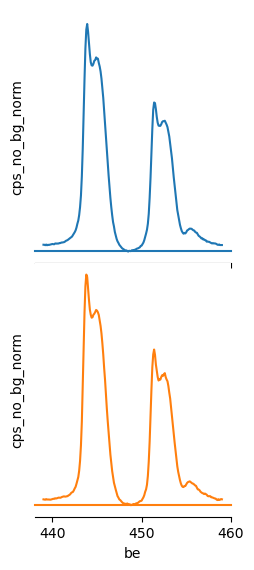

In [167]:
g = sns.FacetGrid(df, row='index', hue='index')
g.map(plt.plot, 'be', 'cps_no_bg_norm')
g.map(plt.axhline, y=0, lw=1.5, clip_on=False)
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.00)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=False, left=True)

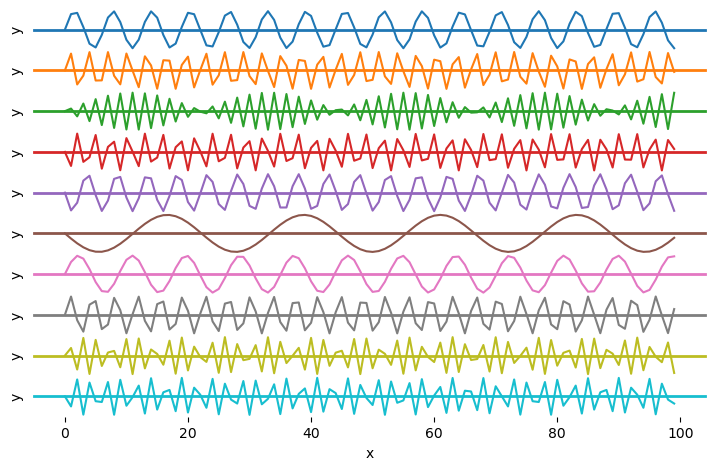

In [148]:
segments = 10
points_per_segment = 100

#your data preparation will vary
x = np.tile(np.arange(points_per_segment), segments)
z = np.floor(np.arange(points_per_segment * segments)/points_per_segment)
y = np.sin(x * (1 + z))
        
    
df = pd.DataFrame({'x': x, 'y': y, 'z': z})

pal = sns.color_palette()
g = sns.FacetGrid(df, row="z", hue="z", aspect=15, height=.5, palette=pal)
g.map(plt.plot, 'x', 'y')
g.map(plt.axhline, y=0, lw=2, clip_on=False)
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.00)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.show()

In [149]:
df['z']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    9.0
996    9.0
997    9.0
998    9.0
999    9.0
Name: z, Length: 1000, dtype: float64

<AxesSubplot:xlabel='x'>

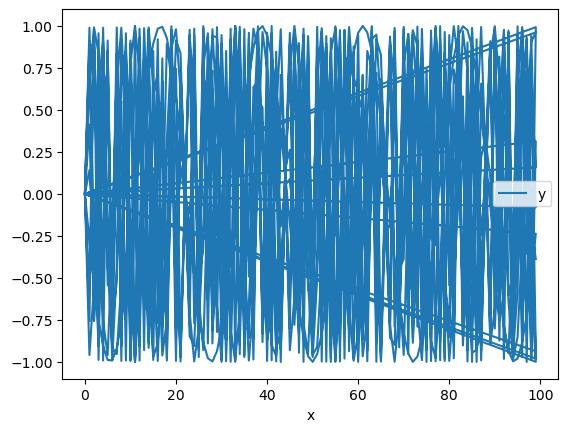

In [150]:
df.plot(x='x',y='y')